# 20240425筆記

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
rect = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

In [9]:
rect

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [10]:
ellipse

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

In [25]:
line1 = [0]*3+[255]*3+[0]*3
line2 = [255]*3+[0]*3+[255]*3
print(line1)
print(line2)

[0, 0, 0, 255, 255, 255, 0, 0, 0]
[255, 255, 255, 0, 0, 0, 255, 255, 255]


In [21]:
img = np.array([line1]*3+[line2]*3+[line1]*3, dtype='uint8')

In [22]:
img

array([[  0,   0,   0, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0],
       [255, 255, 255,   0,   0,   0, 255, 255, 255],
       [255, 255, 255,   0,   0,   0, 255, 255, 255],
       [255, 255, 255,   0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0]], dtype=uint8)

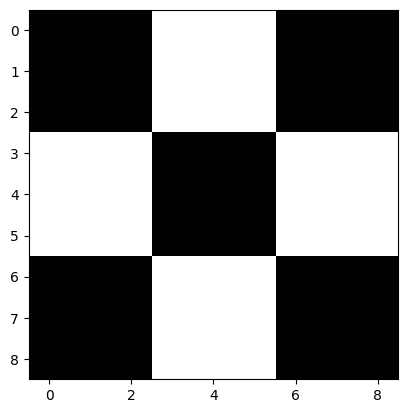

In [23]:
plt.imshow(img, cmap='gray')

In [26]:
cv2.erode(img, rect)

array([[  0,   0,   0,   0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [255, 255,   0,   0,   0,   0,   0, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0]], dtype=uint8)

In [27]:
cv2.erode(img, ellipse)

array([[  0,   0,   0,   0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [255, 255,   0,   0,   0,   0,   0, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0]], dtype=uint8)

In [43]:
kernel = np.array([[1, 1, 1]])
# kernel = np.array([[1], [1], [1]])

In [44]:
img

array([[  0,   0,   0, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0],
       [255, 255, 255,   0,   0,   0, 255, 255, 255],
       [255, 255, 255,   0,   0,   0, 255, 255, 255],
       [255, 255, 255,   0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0]], dtype=uint8)

In [45]:
cv2.erode(img, kernel)

array([[  0,   0,   0,   0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0],
       [255, 255,   0,   0,   0,   0,   0, 255, 255],
       [255, 255,   0,   0,   0,   0,   0, 255, 255],
       [255, 255,   0,   0,   0,   0,   0, 255, 255],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0]], dtype=uint8)

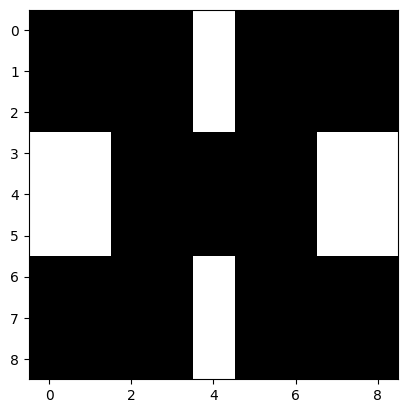

In [46]:
plt.imshow(cv2.erode(img, kernel), cmap="gray")

In [37]:
cv2.dilate(img, kernel)

array([[  0,   0,   0, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255,   0,   0,   0, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0]], dtype=uint8)

## Thresholding v.s. adaptiveThresholding